In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
import numpy as np

##############################################################################
# (1) 수직 중앙선(x=0.5)에서 측정한 u-속도 (Ghia et al., 129-grid 표)
##############################################################################
# 열 설명: [격자 pt.no,  y,  u(Re=100),  u(400),  u(1000),  u(3200),  u(5000),  u(7500),  u(10000)]

ghia_vertical_129 = np.array([
    [129, 1.0000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000,  1.00000],
    [126, 0.9766,  0.84123,  0.75837,  0.65928,  0.53236,  0.48223,  0.47244,  0.47221],
    [125, 0.9688,  0.78871,  0.68439,  0.57492,  0.48296,  0.46120,  0.47048,  0.47783],
    [124, 0.9609,  0.73722,  0.61756,  0.51117,  0.46547,  0.45992,  0.47323,  0.48070],
    [123, 0.9531,  0.68717,  0.55892,  0.46604,  0.46101,  0.46036,  0.47167,  0.47804],
    [110, 0.8516,  0.23151,  0.29093,  0.33304,  0.34682,  0.33556,  0.34228,  0.34635],
    [ 95, 0.7344,  0.00332,  0.16256,  0.18719,  0.19791,  0.20087,  0.20591,  0.20673],
    [ 80, 0.6172, -0.13641,  0.02135,  0.05702,  0.07156,  0.07156,  0.08342,  0.08344],
    [ 65, 0.5000, -0.20581, -0.11477, -0.06080, -0.04272, -0.03039, -0.03800,  0.03111],
    [ 59, 0.4531, -0.21090, -0.17119, -0.10648, -0.08636, -0.07404, -0.07503, -0.07540],
    [ 37, 0.2813, -0.15662, -0.32726, -0.27805, -0.24427, -0.22855, -0.23176, -0.23186],
    [ 23, 0.1719, -0.10150, -0.24299, -0.38289, -0.34323, -0.33050, -0.32393, -0.32709],
    [ 14, 0.1016, -0.06434, -0.14612, -0.29730, -0.41933, -0.40435, -0.38324, -0.38000],
    [ 10, 0.0703, -0.04775, -0.10338, -0.22220, -0.37827, -0.43643, -0.43025, -0.41657],
    [  9, 0.0625, -0.04192, -0.09266, -0.20196, -0.35344, -0.32407, -0.42537, -0.42735],
    [  8, 0.0547, -0.03717, -0.08186, -0.18109, -0.34323, -0.41933, -0.41657, -0.43154],
    [  1, 0.0000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000],
], dtype=float)


##############################################################################
# (2) 수평 중앙선(y=0.5)에서 측정한 v-속도 (Ghia et al., 129-grid 표)
##############################################################################
# 열 설명: [격자 pt.no,  x,  v(Re=100),  v(400),  v(1000),  v(3200),  v(5000),  v(7500),  v(10000)]

ghia_horizontal_129 = np.array([
    [129, 1.0000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000],
    [125, 0.9688, -0.05906, -0.12146, -0.21388, -0.39017, -0.49774, -0.53858, -0.54302],
    [124, 0.9609, -0.07391, -0.15663, -0.27669, -0.47425, -0.55069, -0.55216, -0.52987],
    [123, 0.9531, -0.08864, -0.19254, -0.33714, -0.52357, -0.55408, -0.52347, -0.49099],
    [122, 0.9453, -0.10313, -0.22847, -0.39188, -0.54053, -0.52876, -0.48590, -0.45863],
    [117, 0.9063, -0.16914, -0.23827, -0.51550, -0.44307, -0.41442, -0.41050, -0.41496],
    [111, 0.8594, -0.22445, -0.44993, -0.42665, -0.37401, -0.36214, -0.36213, -0.36737],
    [104, 0.8047, -0.24533, -0.38598, -0.31966, -0.31184, -0.30018, -0.30448, -0.30719],
    [ 65, 0.5000,  0.05454,  0.05186,  0.02526,  0.00999,  0.00945,  0.00824,  0.00831],
    [ 31, 0.2344,  0.17527,  0.30174,  0.32235,  0.28188,  0.27280,  0.27348,  0.27224],
    [ 30, 0.2266,  0.17507,  0.30203,  0.33075,  0.29030,  0.28066,  0.28117,  0.28003],
    [ 21, 0.1563,  0.16077,  0.28124,  0.37095,  0.37119,  0.35368,  0.35060,  0.35070],
    [ 13, 0.0938,  0.12317,  0.22965,  0.32627,  0.42768,  0.42951,  0.41824,  0.41487],
    [ 11, 0.0781,  0.10890,  0.20920,  0.30353,  0.41906,  0.41917,  0.43329,  0.43564],
    [ 10, 0.0703,  0.10091,  0.19713,  0.29012,  0.40917,  0.34369,  0.44030,  0.43979],
    [  9, 0.0625,  0.09233,  0.18360,  0.27485,  0.39560,  0.42447,  0.43979,  0.43983],
    [  1, 0.0000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000,  0.00000],
], dtype=float)


##############################################################################
# 사용 예시
##############################################################################


In [7]:
Re = 1000
Mx = 128
n = 30000

dx = dy = 1/Mx
x = y = np.linspace(dx, 1-dx, Mx)

if Re==100:
    idx = 2
elif Re==400:
    idx = 3
elif Re==1000:
    idx = 4

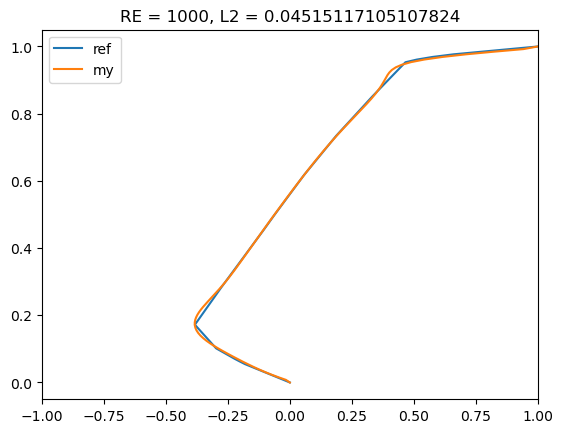

In [ ]:
u = pd.read_csv(f"RE_{Re}_{Mx}/u_{n}.csv", header=None).to_numpy()

dx = dy = 1/Mx
grid = np.linspace(dx, 1-dx, Mx)
x = np.linspace(0, 1, Mx+2)
x[1:-1] = grid
y = x.copy()

# ------------
ff = interp1d(y, u[:, int(Mx/2)], kind="cubic")
error = ghia_vertical_129[:, idx] - ff(ghia_vertical_129[:, 1])
L2_error = (np.linalg.norm(error)/np.linalg.norm(ghia_vertical_129[:, idx]))

# ----------
plt.plot(ghia_vertical_129[:, idx], ghia_vertical_129[:, 1], label="ref")
plt.plot(u[:, int(Mx/2)], y, label="my")
plt.xlim(-1, 1)
plt.title(f"RE = {Re}, L2 = {L2_error}")
plt.legend()


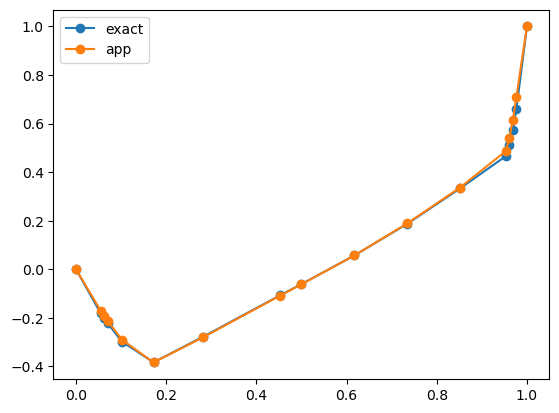

In [9]:
plt.plot(ghia_vertical_129[:, 1], ghia_vertical_129[:, idx], "-o", label="exact")
plt.plot(ghia_vertical_129[:, 1], ff(ghia_vertical_129[:, 1]), "-o", label="app")
# plt.plot(ghia_vertical_129[1:-1, 1], error, "-o", label="error")
plt.legend()

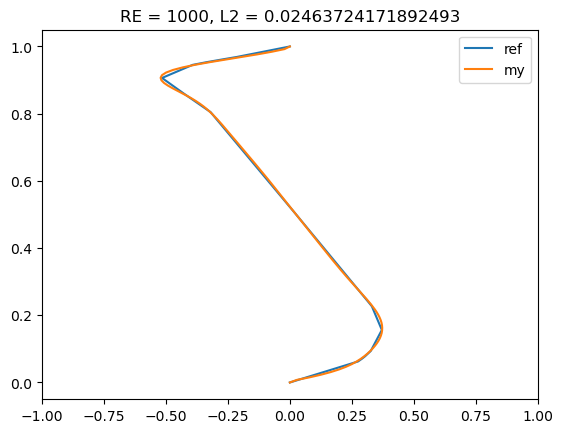

In [ ]:
v = pd.read_csv(f"RE_{Re}_{Mx}/v_{n}.csv", header=None).to_numpy()

# ------------
ff = interp1d(x, v[int(Mx/2), :], kind="cubic")
error = ghia_horizontal_129[:, idx] - ff(ghia_horizontal_129[:, 1])
L2_error = (np.linalg.norm(error)/np.linalg.norm(ghia_horizontal_129[:, idx]))

# ----------
plt.plot(ghia_horizontal_129[:, idx], ghia_horizontal_129[:, 1], label="ref")
plt.plot(v[int(Mx/2), :], y, label="my")
plt.xlim(-1, 1)
plt.title(f"RE = {Re}, L2 = {L2_error}")
plt.legend()


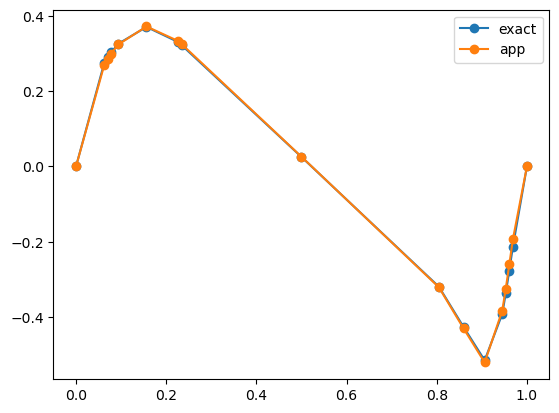

In [11]:
plt.plot(ghia_horizontal_129[:, 1], ghia_horizontal_129[:, idx], "-o", label="exact")
plt.plot(ghia_horizontal_129[:, 1], ff(ghia_horizontal_129[:, 1]), "-o", label="app")
# plt.plot(ghia_horizontal_129[1:-1, 1], error, "-o", label="error")
plt.legend()